# Due June/20/2018 11:59:59 PM, PST.

## Probability Review (10%)
In a certain day care class, 30% of the children have grey eyes, 50% of them have blue and the other 20%'s eyes are in other colors. One day they play a game together. In the first run, 65% of the grey eye ones, 82% of the blue eyed ones and 50% of the children with other eye color were selected. Now, if a child is selected randomly from the class, and we know that he/she was not in the first game, what is the probability that the child has blue eyes?

Solution:
    <br>

let the total no of students be X
<br>
grey eyes = .3x
<br>
blue eyes = .5x
<br>
other color = .2x
<br>
<br>
first run:
<br>
grey eyes = .65*.3x = .195x
<br>
blue eyes = .82*.5x = .41x
<br>
other color = .5 * .2x = .1x
<br>
total children selected = .705x
<br>
<br>
eye color percentage of the left overs from the first run:
<br>
grey eyes = .3x - .195x = .105x
<br>
blue eyes = .5x - .41x = .09x
<br>
other color = .2x - .1x = .1x
<br>
total children left = .295x
<br>    
eye color percentage of left over:
<br>
grey eye = .105/.295 = 35.60%
<br>
blue eye = .09/.295 = 30.5%
<br>
other color = .1/.295 = 33.90%
<br>    
if we know that the child is selected from the leftovers of the first game, the probability of that child having blue eyes is 30.5%

## Linear Algebra Review (10%)
(1) What is Gram-Schmidt procedure ? 
<br>
(2) Do Gram-Schmidt procedure for the vectors x1 = (1, 1 ,0), x2 = (1, 0, 1), x3 = (0, 1, 1) in $R^3$.

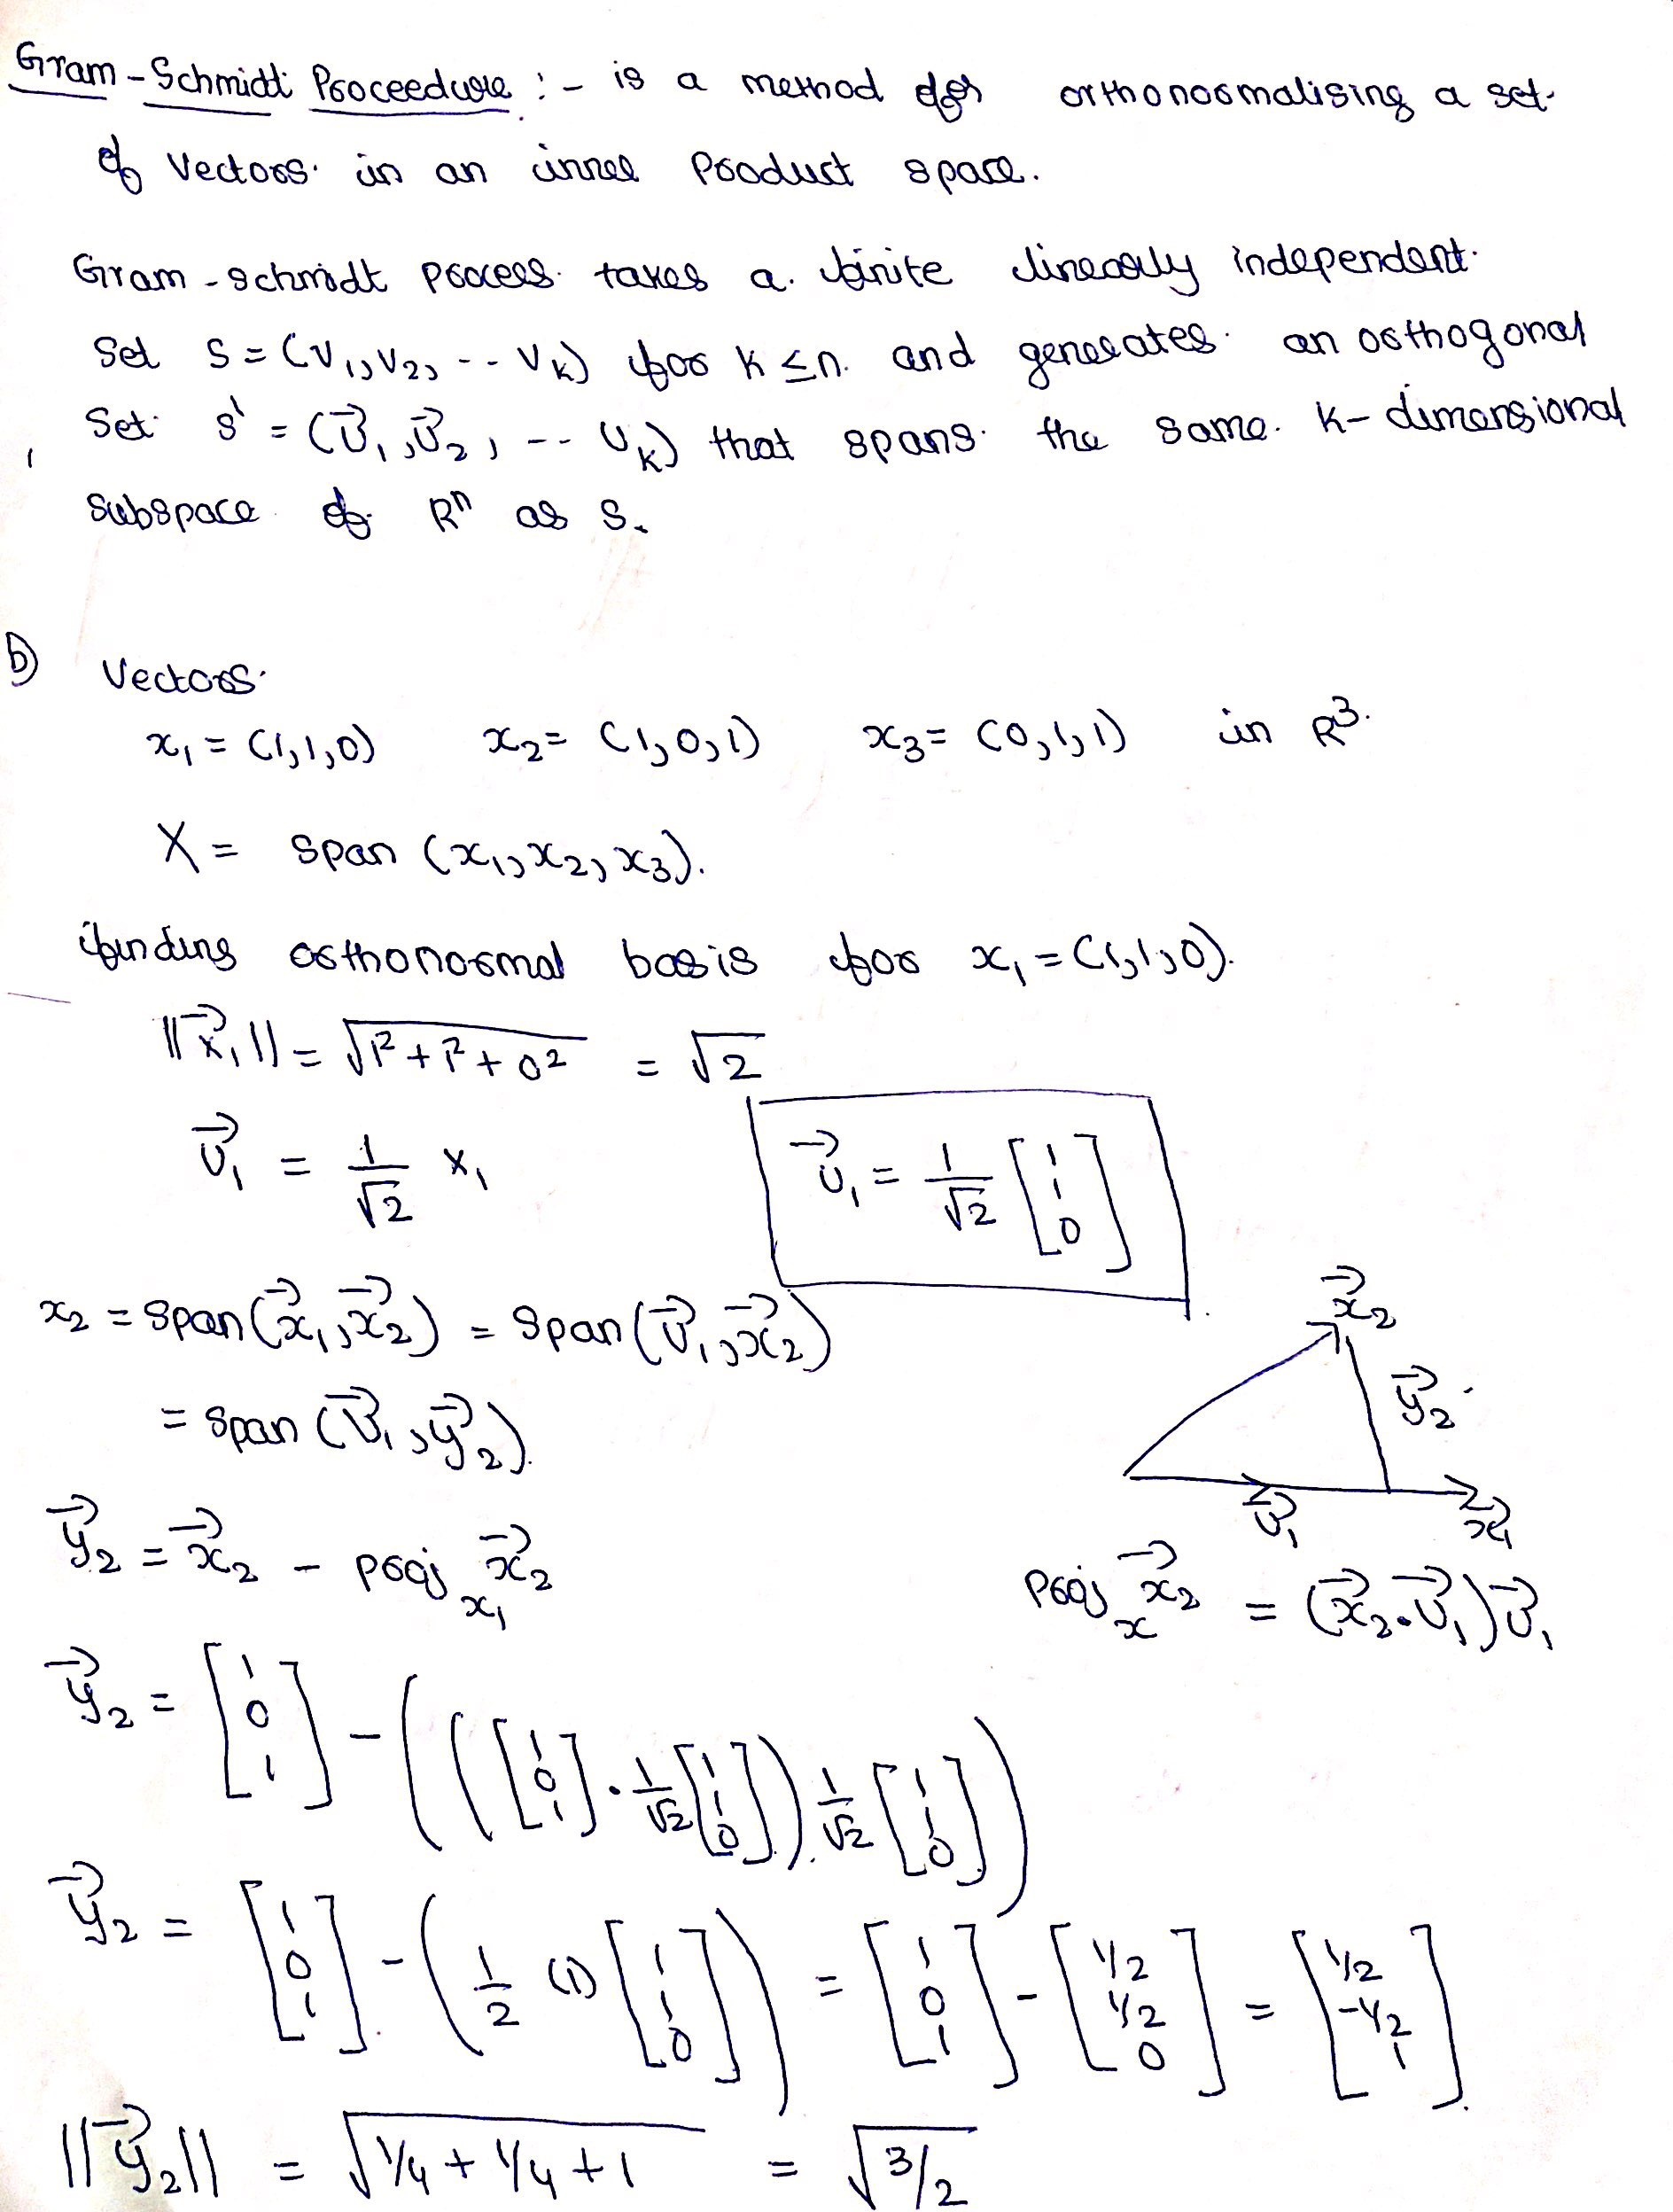

In [3]:
from IPython.display import Image
Image(filename="/Users/jeevan venkataramana/Downloads/Question-2-1.jpg", width=400, height=400)

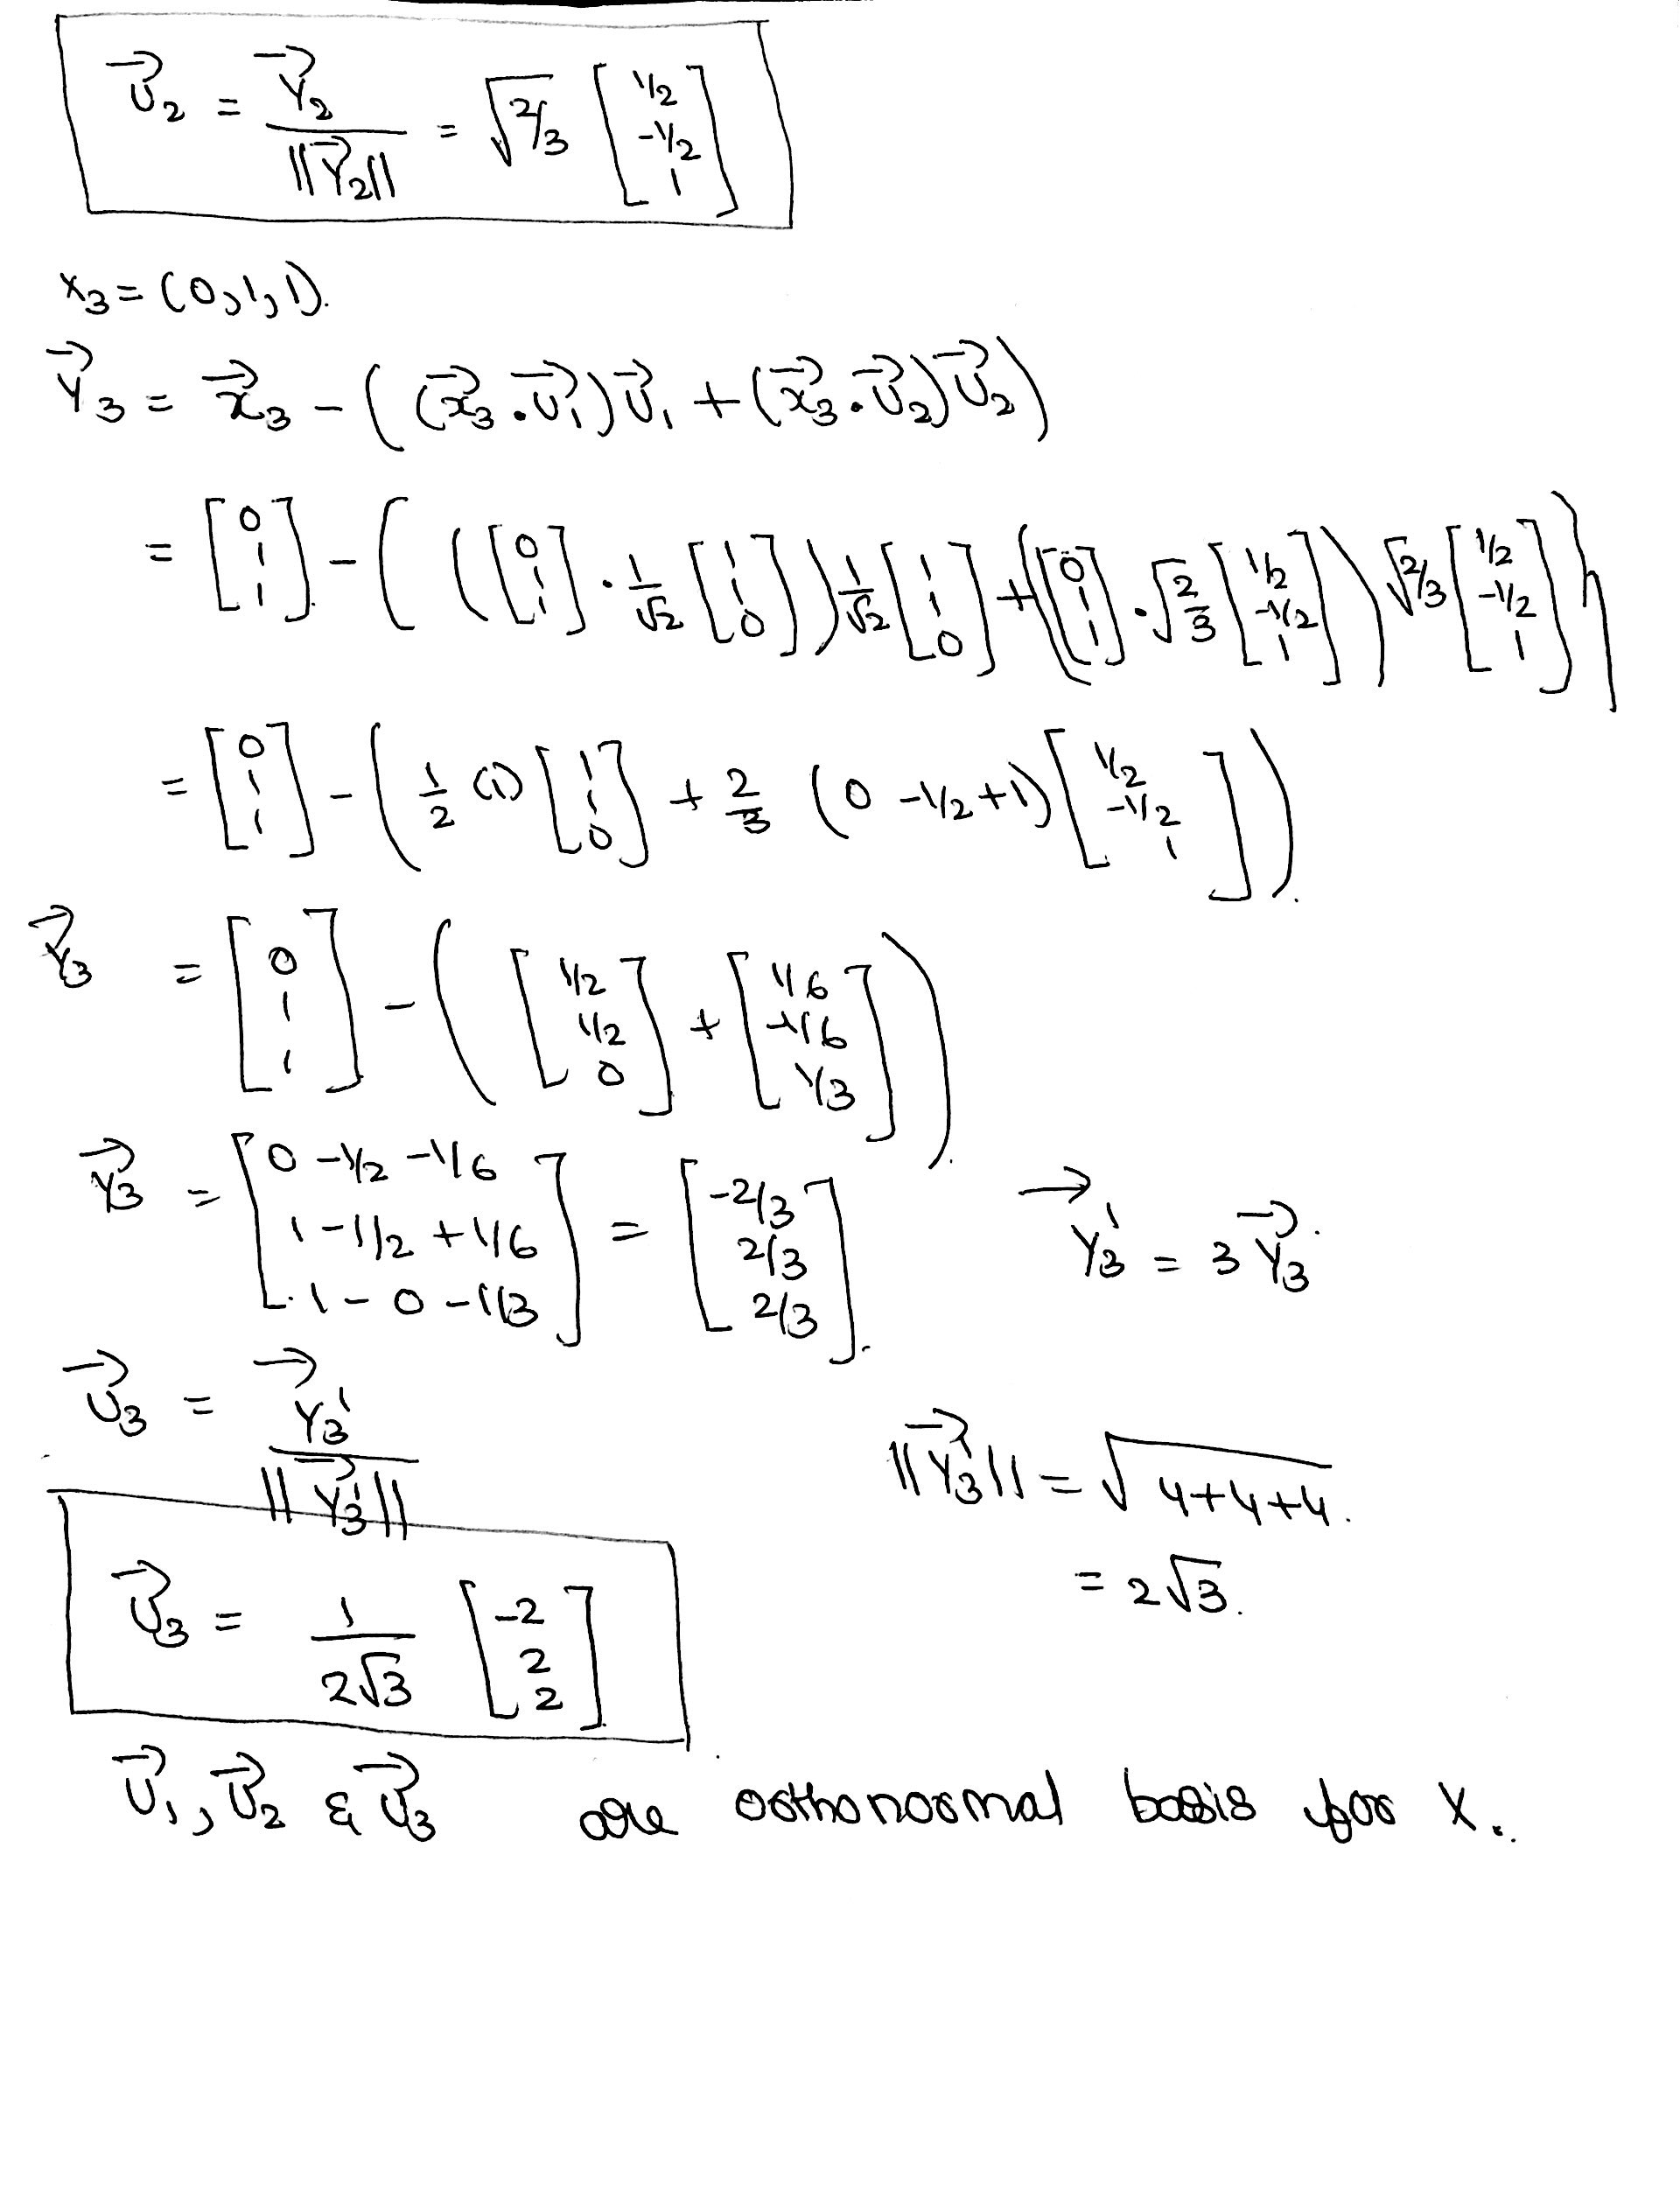

In [4]:
Image(filename="/Users/jeevan venkataramana/Downloads/Question-2-2.jpg", width=400, height=400)

## Hessian for Logistic Regression (10%)
Consider the average empirical loss  for logistic regression:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log (1 + e^{-y_i \theta^T x_i}) = - \frac{1}{m} \sum_{i=1}^{m} \log (h_{\theta}(y_i x_i)))$$

where $h_{\theta}(x) = g(\theta^{T} x)$ and $g(z) = \frac{1}{1 + e^{-z}}$. 

(1) Find the Hessian $H$ of $J(\theta)$.
<br>
(2) Show that Hessian is non-negative definite.



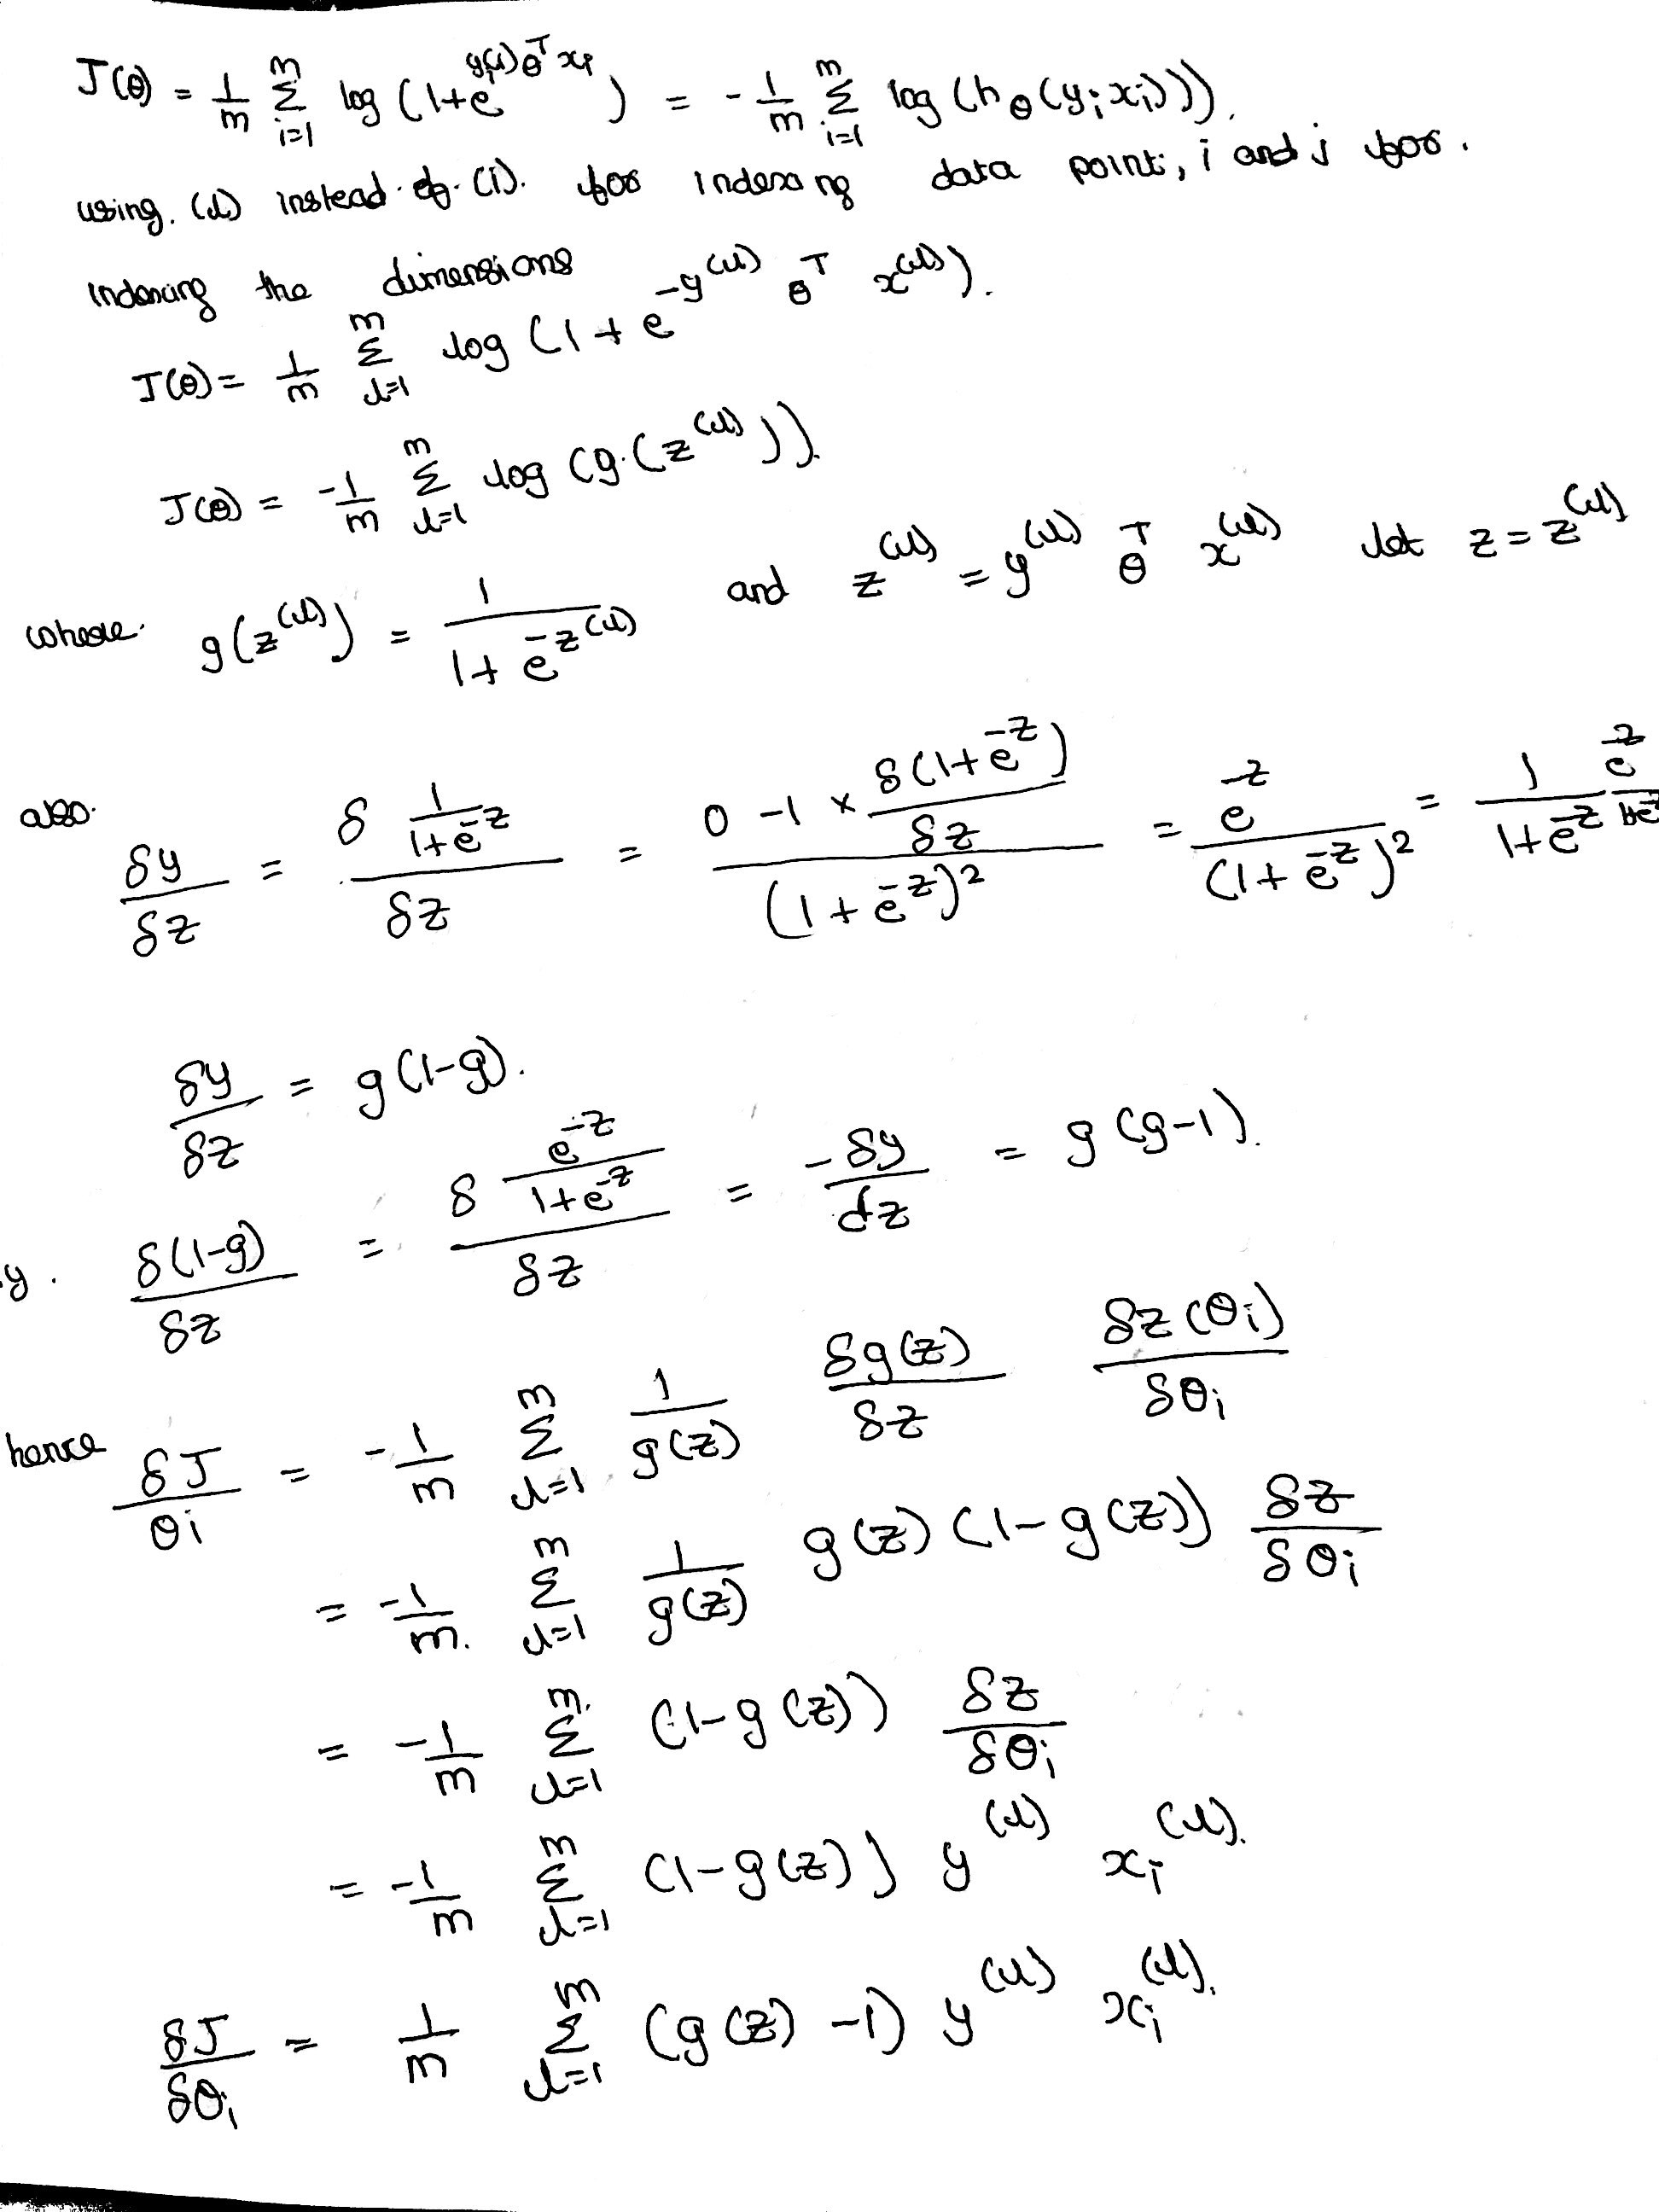

In [5]:
from IPython.display import Image
Image(filename="/Users/jeevan venkataramana/Downloads/Question-3-1.jpg", width=400, height=400)

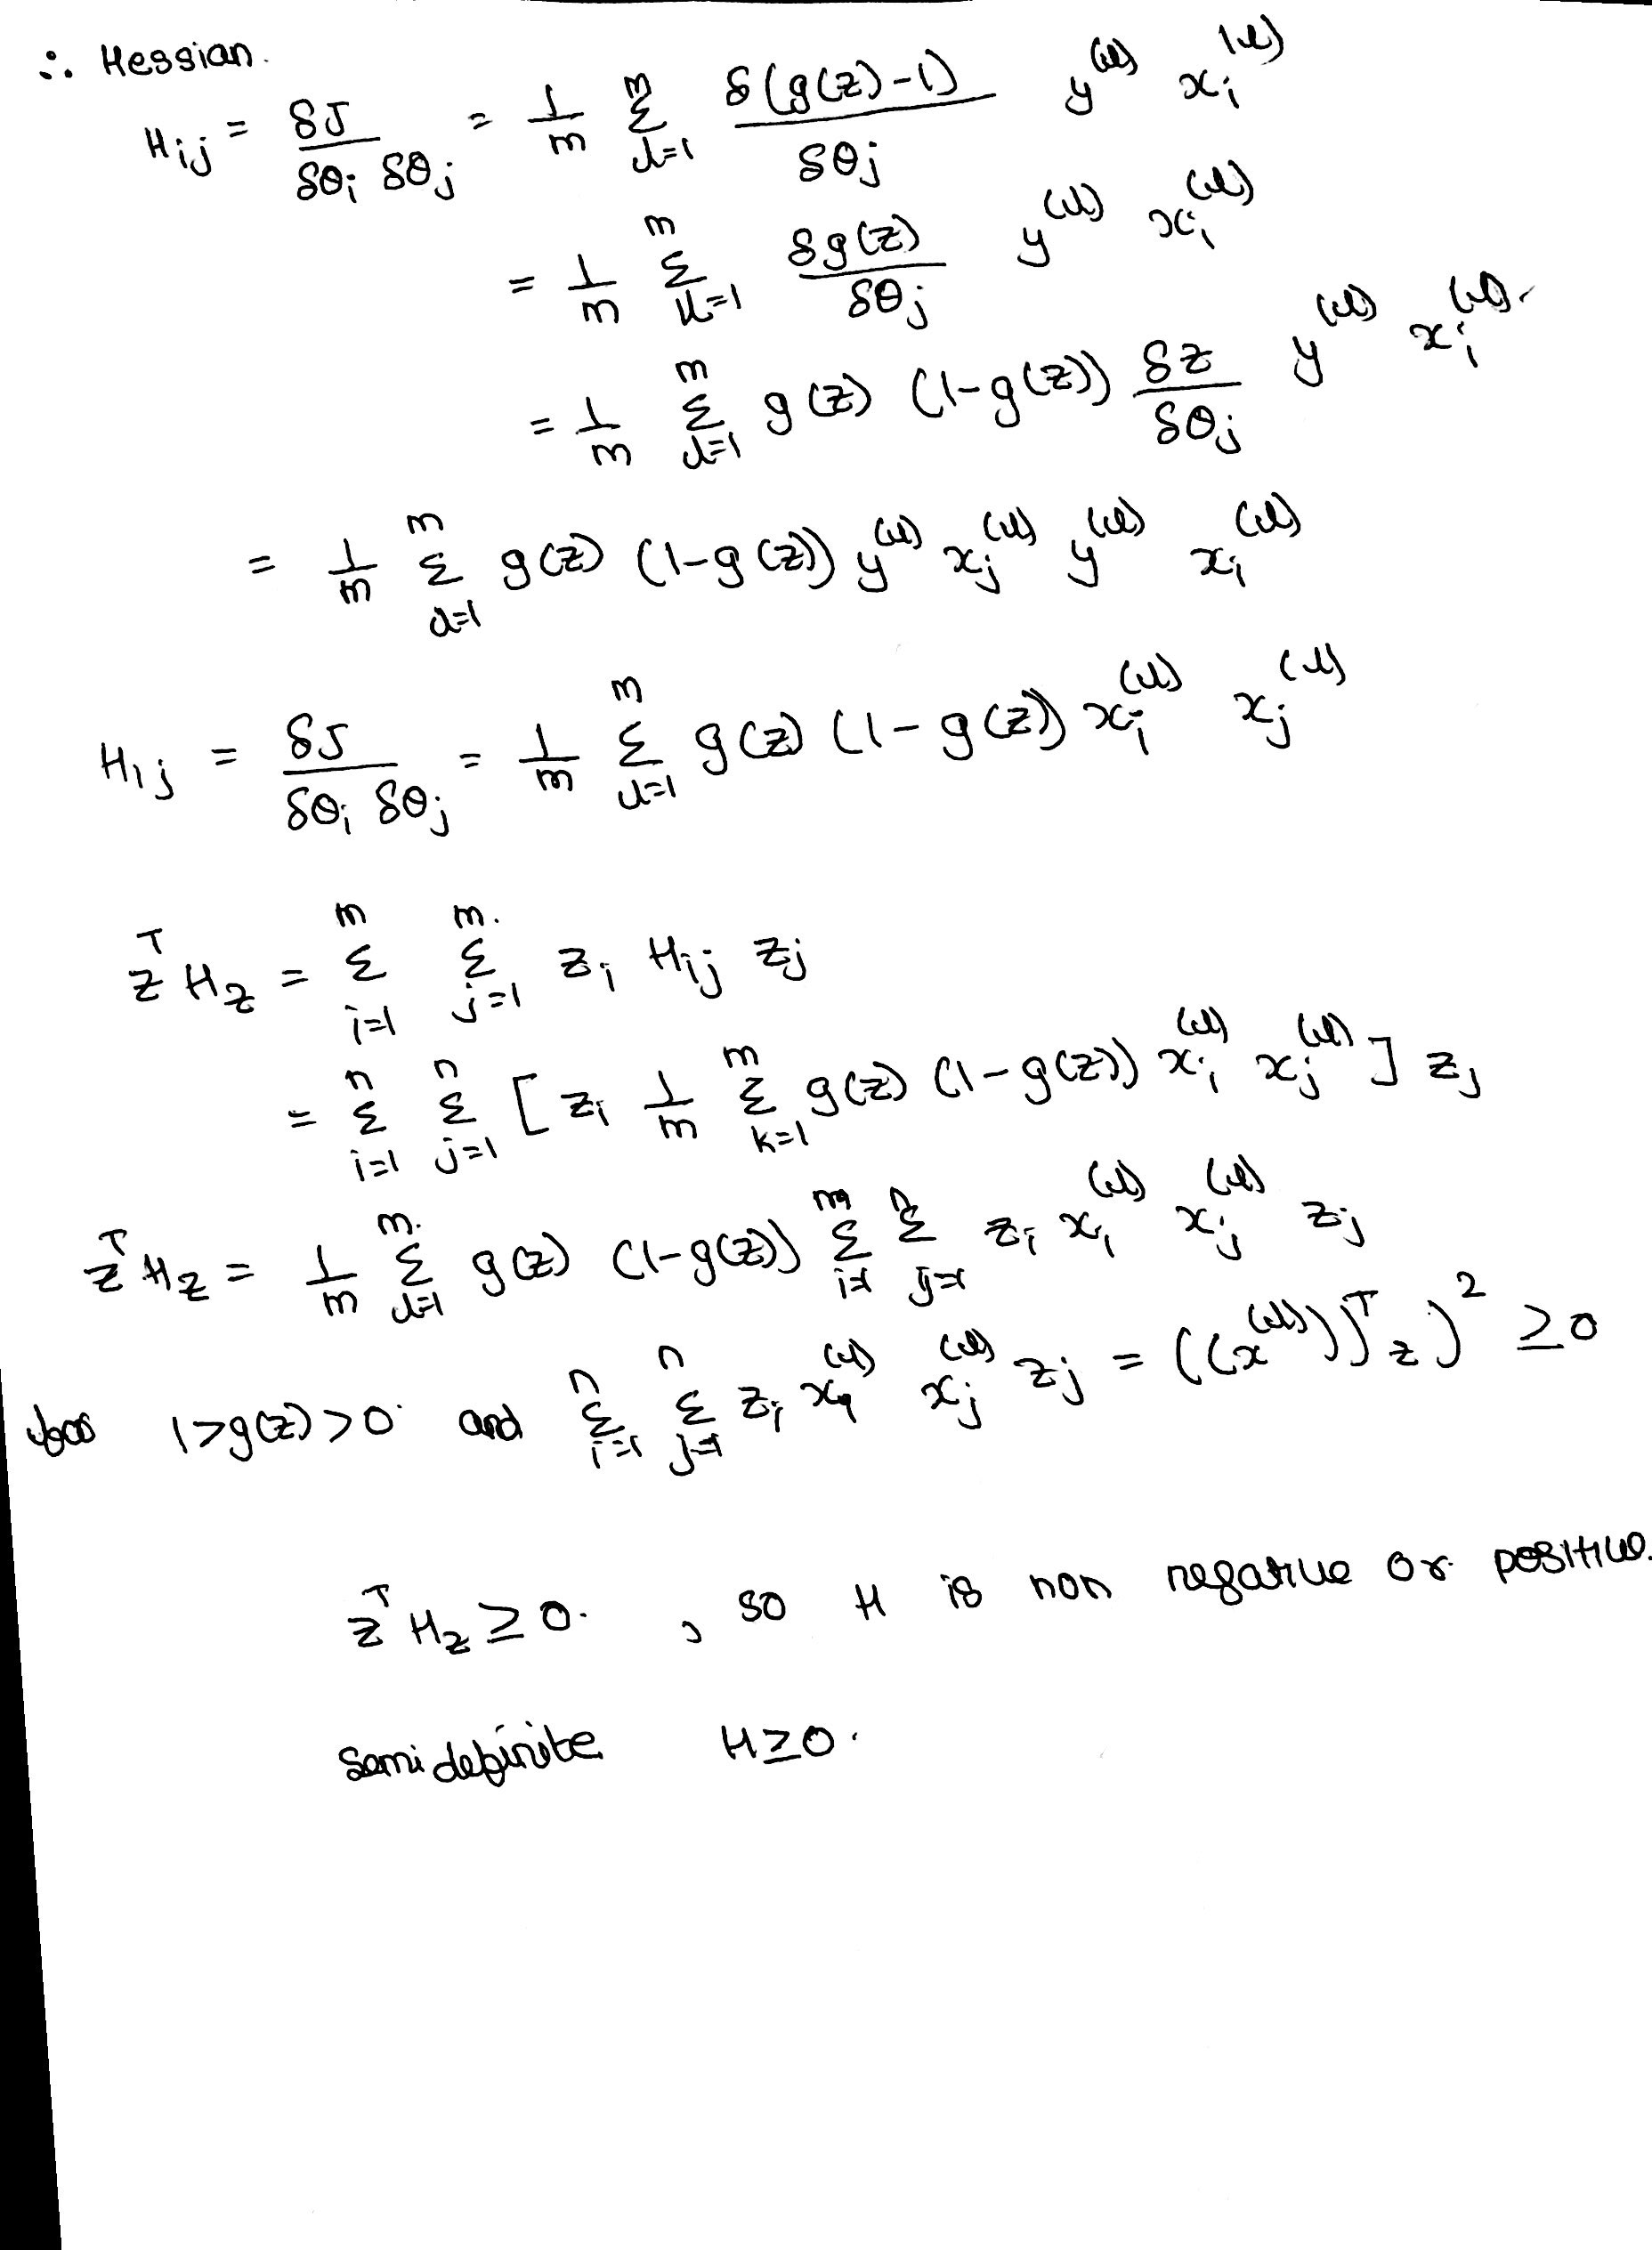

In [6]:
Image(filename="/Users/jeevan venkataramana/Downloads/Question-3-2.jpg", width=400, height=400)

### linear regression model using stochastic gradient (40%)

In this problem, we will train a linear regression model using stochastic gradient descent on the
Wine Quality dataset. The data provide to train is "winequality-white.csv". We will partition the problem into following three parts:

<br>

A. Making Predictions

<br>

B. Esimating Coefficients

<br>

C. Wine Quality Testing

The Wine Quality Dataset involves predicting the quality of white wines on a scale given
chemical measures of each wine. It is a multiclass classication problem, but could also be
framed as a regression problem. The number of observations for each class is not balanced.
There are 4,898 observations with 11 input variables and 1 output variable. The variable names
are as follows:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).


In [7]:
# Possible Python lib required to run this problem. 
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import numpy as np

# A. Making Prediction
### Given dataset with 5 point, the first is input value, 
### and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]

### Also given linear model coefficient as 

coef = [0.5, 0.8]

### where the first component is b0 and the second component is b1 and 
### model is assumed as y = b0 + b1*x

### Can you write a predict function to return predicted value?



In [8]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
coef = [0.5, 0.8]
def predict(dataset,coef):
    dataset = np.array(dataset)
    y=coef[0]+coef[1]*dataset[:,0]
    return y

predict(dataset,coef)

array([1.3, 2.1, 3.7, 2.9, 4.5, 5.3])

### B. Esimating Coefficients



### Given dataset with 6 point, the first is input value, and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 6]]

l_rate = 0.01

n_epoch = 50

### Can you write a function to return coefficients based on stochastic gradient descent method 

In [9]:
def coefficients(model, l_rate, n_epoch):
    coef = [0.0,0.0]
    for epoch in range(n_epoch):
        for row in model:
            y_value = estimate(row, coef)
            # Finding error
            error = y_value - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef

def estimate(row, coefficients):
    y_value = coefficients[0]
    for i in range(len(row)-1):
        y_value += coefficients[i + 1] * row[i]
        return y_value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
l_rate = 0.001
n_epoch = 50
sgd_coef = coefficients(dataset, l_rate, n_epoch)
print(sgd_coef)

[0.205022667788194, 0.8921013024625108]


###### C. Wine Quality Testing

If we partition the data set uniformly into 6 parts, could you write a code to get the average value of absoulte error between prediction and expected (average over these 6 partitoned datasets)?

In [2]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Calculate absolute error
def abs_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += abs(prediction_error)
    mean_abs_error = sum_error / float(len(actual))
    return mean_abs_error

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        abs_e = abs_metric(actual, predicted)
        scores.append(abs_e)
    return scores

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 6
l_rate = 0.01
n_epoch = 30
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Abs Error: %.3f' % (sum(scores)/float(len(scores))))


Scores: [0.09591122916413304, 0.09808252471060186, 0.09857738947694145, 0.10338948530409997, 0.09925331670548483, 0.09532233734944878]
Mean Abs Error: 0.098


### Naive Bayes Classifier for Digit Recognition (30%)

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


# A. Create a 10x10 grid to visualize 10 examples of each digit.

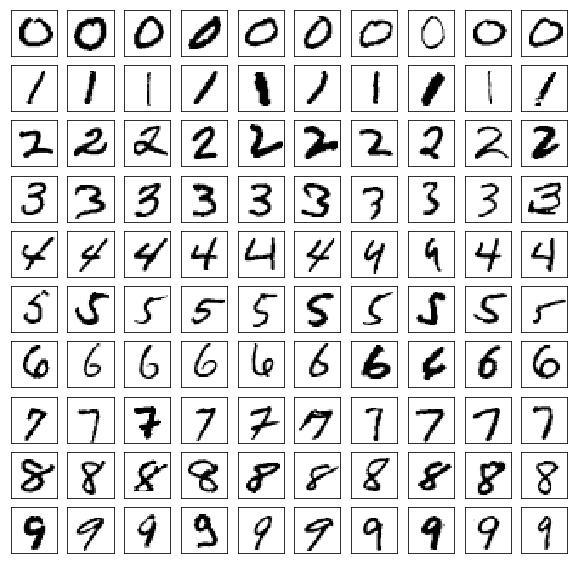

In [3]:
## Solutions

def P1(digit_examples=10):
    # Set the plot colormap & size 
    plt.rc('image',cmap="Greys")
    # Set the plot size 
    plt.figure( figsize=(digit_examples, len(np.unique(Y)) ) )
         
    # Loop each of the grid with the digits * digit_examples (10*10) dimenstion      
    for digit in range(len(np.unique(Y))):
        # Extract 10 example for each digit
        examples = X[np.where(Y == digit)[0][:digit_examples]]
        # Generate the elements of an iterator as well as an index number 
        for index, image in enumerate(examples):
            # Setup the subplot in (Digit, col, location)
            plt.subplot(len(np.unique(Y)), digit_examples, digit * digit_examples + index + 1)
            # Reshape the image into a 28 x 28 matrix
            plt.imshow(image.reshape(28,28))
            # Get current ax instance 
            ax = plt.gca() 
            # hide axis lables
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)

### STUDENT END ###

P1(10)

### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

In [4]:
## Solutions

###########################  BinaryNB, MultinaryNB #######################
# Fit a Naive Bayes classifier and report accuracy on the dev data.


# Show several mistake examples 
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf7_Binary = BernoulliNB(alpha=1)
clf7_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf7_Binary.score(binarized_dev_data, dev_labels))

#### Trinary Class, Uniform partition ########

threshold1 = 85.0
threshold2 = 170.0
trinarized_X_Train = np.array(train_data)
trinarized_X_Train[trinarized_X_Train <= threshold1] = 0
trinarized_X_Train[np.logical_and(trinarized_X_Train  > threshold1, trinarized_X_Train <= threshold2)] = 1
trinarized_X_Train[trinarized_X_Train  > threshold2] = 2

trinarized_dev_data = np.array(dev_data)
trinarized_dev_data[trinarized_dev_data <= threshold1] = 0
trinarized_dev_data[np.logical_and(trinarized_dev_data  > threshold1, trinarized_dev_data <= threshold2)] = 1
trinarized_dev_data[trinarized_dev_data  > threshold2] = 2

clf7_Trinary = MultinomialNB(alpha=1)
clf7_Trinary.fit(trinarized_X_Train, train_labels)
print('Trinary accuracy: ', clf7_Trinary.score(trinarized_dev_data, dev_labels))

# Adding completely uninform feature (at here we do) will decrease test accuracy.
# Adding informative features will increase accuracy. A Naive Bayes classifier needs
# a alot of samples that's logarithmic in the number of features, so at some point
# adding good features should start decreasing accuracy. Another important
# thing is that using too many features may introduce overfitting problem which 
# decrease accuracy.

Binary accuracy:  0.837
Trinary accuracy:  0.825


### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [5]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


#### Gaussian distribution Class ########

clf9_Gauss = GaussianNB()
clf9_Gauss.fit(train_data, train_labels)
print('Gaussian NB accuracy: ', clf9_Gauss.score(dev_data, dev_labels))

# Because the distribution is not Gaussian, so GaussianNB performance is worse then BinaryNB or MultinaryNB.
# There are two solutions, binarized and distorting Gaussian distribution to make new distribution similar to 
# threshold parition effect.

#### Gaussian distribution Class modification########
# Method 1, binarized_X_Train in Gaussian
# Adjuting threshold value
threshold = 252.5
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

#Using binarized data as train data 
clf9_GaussFix = GaussianNB()
clf9_GaussFix.fit(binarized_X_Train, train_labels)
print('Gaussian NB Fix accuracy by threshold: ', clf9_GaussFix.score(dev_data, dev_labels))

# Method 2, Adjust mean and variance first

def P9():
    clf = GaussianNB()
    clf.fit(train_data, train_labels)
    return clf

gnb = P9()
# search in grid values composed by mean and variance
# Adjust mean, find folloing value is best for signla between 0 and 350
gnb.theta_ += 20
# Adjust variance, find following value is best for signla between 0 and 350 
gnb.sigma_ += 300
print('Gaussian NB Fix accuracy by varaince and mean: ', gnb.score(dev_data, dev_labels) )
### STUDENT END ###

gnb = P9()


#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf9_Binary = BernoulliNB(alpha=1)
clf9_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf9_Binary.score(binarized_dev_data, dev_labels))

Gaussian NB accuracy:  0.585
Gaussian NB Fix accuracy by threshold:  0.729
Gaussian NB Fix accuracy by varaince and mean:  0.806
Binary accuracy:  0.814
